In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('notebook')
%matplotlib notebook

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.float_format = '{:,.1f}'.format

# Loading data

In [104]:
cats = {col: 'category' for col in list(set(df.columns) - set(df.describe().columns))}
df = pd.read_csv('data/diabetic_data.csv', na_values='?', low_memory=False, dtype=cats)

In [105]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
encounter_id                101766 non-null int64
patient_nbr                 101766 non-null int64
race                        99493 non-null category
gender                      101766 non-null category
age                         101766 non-null category
weight                      3197 non-null category
admission_type_id           101766 non-null category
discharge_disposition_id    101766 non-null category
admission_source_id         101766 non-null category
time_in_hospital            101766 non-null int64
payer_code                  61510 non-null category
medical_specialty           51817 non-null category
num_lab_procedures          101766 non-null int64
num_procedures              101766 non-null int64
num_medications             101766 non-null int64
number_outpatient           101766 non-null int64
number_emergency            101766 non-null int64
number_inpatient 

In [6]:
df.dtypes.unique()

array([dtype('int64'),
       CategoricalDtype(categories=['AfricanAmerican', 'Asian', 'Caucasian', 'Hispanic',
                  'Other'],
                 ordered=False),
       CategoricalDtype(categories=['Female', 'Male', 'Unknown/Invalid'], ordered=False),
       CategoricalDtype(categories=['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)',
                  '[50-60)', '[60-70)', '[70-80)', '[80-90)', '[90-100)'],
                 ordered=False),
       dtype('O')], dtype=object)

In [7]:
df.nunique().sort_values(ascending=False)

encounter_id                101766
patient_nbr                 71518 
diag_3                      789   
diag_2                      748   
diag_1                      716   
num_lab_procedures          118   
num_medications             75    
medical_specialty           72    
number_outpatient           39    
number_emergency            33    
discharge_disposition_id    26    
number_inpatient            21    
admission_source_id         17    
payer_code                  17    
number_diagnoses            16    
time_in_hospital            14    
age                         10    
weight                      9     
admission_type_id           8     
num_procedures              7     
race                        5     
repaglinide                 4     
max_glu_serum               4     
A1Cresult                   4     
metformin                   4     
rosiglitazone               4     
pioglitazone                4     
insulin                     4     
nateglinide         

In [8]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,"101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0","101,766.0"
mean,"165,201,645.6","54,330,400.7",2.0,3.7,5.8,4.4,43.1,1.3,16.0,0.4,0.2,0.6,7.4
std,"102,640,296.0","38,696,359.3",1.4,5.3,4.1,3.0,19.7,1.7,8.1,1.3,0.9,1.3,1.9
min,"12,522.0",135.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
25%,"84,961,194.0","23,413,221.0",1.0,1.0,1.0,2.0,31.0,0.0,10.0,0.0,0.0,0.0,6.0
50%,"152,388,987.0","45,505,143.0",1.0,1.0,7.0,4.0,44.0,1.0,15.0,0.0,0.0,0.0,8.0
75%,"230,270,887.5","87,545,949.8",3.0,4.0,7.0,6.0,57.0,2.0,20.0,0.0,0.0,1.0,9.0
max,"443,867,222.0","189,502,619.0",8.0,28.0,25.0,14.0,132.0,6.0,81.0,42.0,76.0,21.0,16.0


# Exploratory analysis

In [9]:
missing_values = df.isnull().sum()/df.shape[0]*100
missing_values.sort_values(ascending=True, inplace=True)
missing_df = missing_values.reset_index().rename(columns={'index': 'features', 0: 'values'})

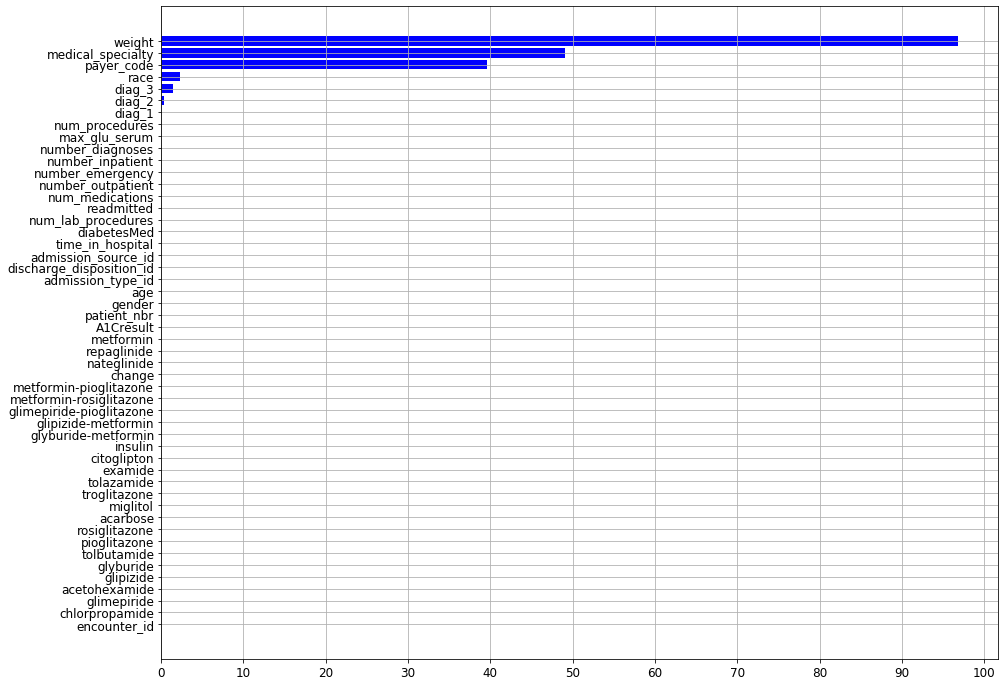

In [10]:
fig, axes = plt.subplots(figsize=(15, 12))
axes.barh(missing_df['features'], missing_df['values'], color='b')
plt.xticks(np.linspace(0, 100, 11))
plt.grid(True);

In [11]:
df['race'].unique()

[Caucasian, AfricanAmerican, NaN, Other, Asian, Hispanic]
Categories (5, object): [Caucasian, AfricanAmerican, Other, Asian, Hispanic]

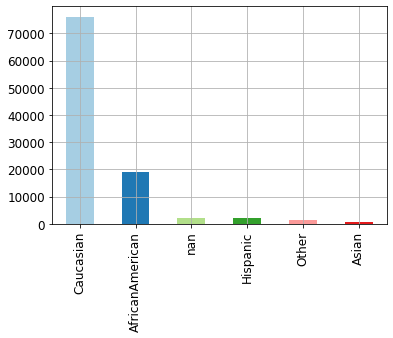

In [12]:
race_sorted_df = df['race'].value_counts(dropna=False)
race_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True);

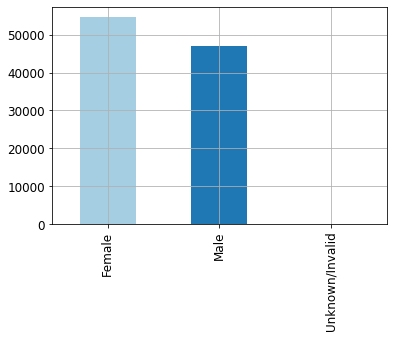

In [13]:
race_sorted_df = df['gender'].value_counts(dropna=False)
race_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True);

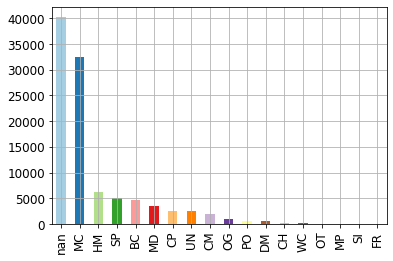

In [14]:
race_sorted_df = df['payer_code'].value_counts(dropna=False)
race_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True);

In [15]:
df.shape

(101766, 50)

In [16]:
df = df.loc[df.race.notnull()]
df = df.loc[df.gender != 'Unknown/Invalid']

In [17]:
df.drop(['weight', 'medical_specialty', 'payer_code', 'patient_nbr', 'encounter_id'], axis=1, inplace=True)

In [19]:
df.head()

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),1,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),3,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),2,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),2,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),1,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [20]:
df.shape

(99492, 42)

In [21]:
df[['diag_1', 'diag_2', 'diag_3']].nunique()

diag_1    714
diag_2    745
diag_3    786
dtype: int64

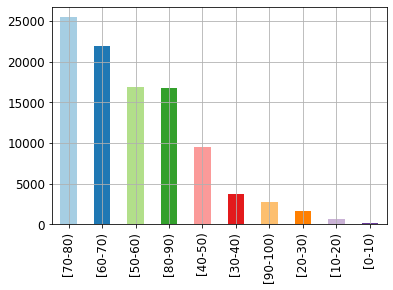

In [22]:
race_sorted_df = df['age'].value_counts(dropna=False)
race_sorted_df.plot(kind='bar', color=plt.cm.Paired.colors)
plt.grid(True);

In [48]:
num_cols = list(df.describe().columns)
print(len(num_cols))

8


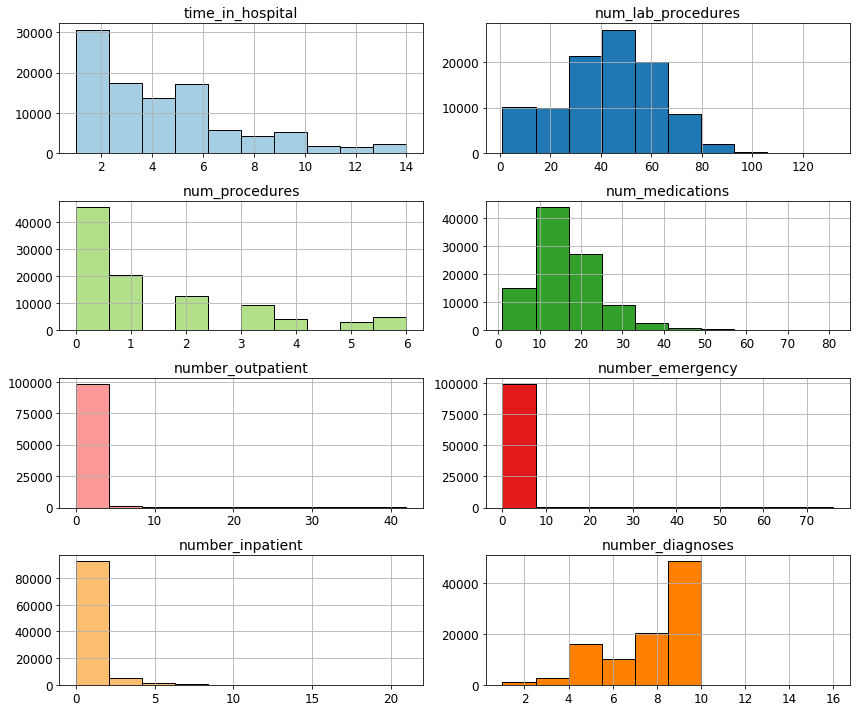

In [83]:
fig, axes = plt.subplots(4, 2, figsize=(12, 10))
colors = plt.cm.Paired.colors
for c, ax, col in zip(colors, axes.flat, num_cols):
    ax.hist(df[col], color=c, edgecolor='k', bins=10)
    ax.set_title(col)
    ax.grid(True)
fig.tight_layout()